In [291]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-approval-prediction-dataset/loan_approval_dataset.csv


In [292]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

In [293]:
df = pd.read_csv("/kaggle/input/loan-approval-prediction-dataset/loan_approval_dataset.csv")

In [294]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [295]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)


Numeric columns: Index(['loan_id', ' no_of_dependents', ' income_annum', ' loan_amount',
       ' loan_term', ' cibil_score', ' residential_assets_value',
       ' commercial_assets_value', ' luxury_assets_value',
       ' bank_asset_value'],
      dtype='object')
Categorical columns: Index([' education', ' self_employed', ' loan_status'], dtype='object')


In [296]:
print(df.isnull().sum())

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64


In [297]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


df = pd.read_csv('/kaggle/input/loan-approval-prediction-dataset/loan_approval_dataset.csv')  # তোমার dataset path দিন


df.columns = df.columns.str.strip()


df_encoded = df.copy()
for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

correlation_matrix = df_encoded.corr()

loan_status_corr = correlation_matrix['loan_status']
print(loan_status_corr)


loan_id                    -0.017685
no_of_dependents            0.018114
education                   0.004918
self_employed              -0.000345
income_annum                0.015189
loan_amount                -0.016150
loan_term                   0.113036
cibil_score                -0.770518
residential_assets_value    0.014367
commercial_assets_value    -0.008246
luxury_assets_value         0.015465
bank_asset_value            0.006778
loan_status                 1.000000
Name: loan_status, dtype: float64


In [298]:
df.shape

(4269, 13)

In [299]:
df.drop(columns=['loan_id','education','commercial_assets_value'],inplace=True)

In [300]:
df.shape

(4269, 10)

In [301]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['loan_status']),
                                                 df['loan_status'],
                                                 test_size=0.2,
                                                random_state=42)

In [302]:
X_train.head()

,no_of_dependents,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,luxury_assets_value,bank_asset_value
1675,5,No,7900000,29900000,6,568,5800000,15900000,8700000
1164,0,Yes,9600000,34000000,12,710,23800000,38100000,7800000
192,1,No,800000,2900000,8,682,2200000,2900000,700000
910,2,Yes,4900000,13100000,18,754,8200000,16500000,7200000
567,5,Yes,3000000,11100000,12,441,8500000,7300000,2000000


In [303]:

trf1 = ColumnTransformer([
    ('ohe_self_employed', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), [1])
], remainder='passthrough')


In [304]:
trf2 = ColumnTransformer([
    ('scale',MinMaxScaler(),slice(0,10))
])

In [305]:
trf3 = SelectKBest(score_func=chi2,k=8)

In [306]:
trf4 = DecisionTreeClassifier(random_state=42)

In [307]:
pipe = make_pipeline(trf1,trf2,trf3,trf4)

In [308]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer-1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_self_employed',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [1])])),
                ('columntransformer-2',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 10, None))])),
                ('selectkbest',
                 SelectKBest(k=8,
                             score_func=<function chi2 at 0x791432998b80>)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [309]:
pipe.named_steps

{'columntransformer-1': ColumnTransformer(remainder='passthrough',
                   transformers=[('ohe_self_employed',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse_output=False),
                                  [1])]),
 'columntransformer-2': ColumnTransformer(transformers=[('scale', MinMaxScaler(), slice(0, 10, None))]),
 'selectkbest': SelectKBest(k=8, score_func=<function chi2 at 0x791432998b80>),
 'decisiontreeclassifier': DecisionTreeClassifier(random_state=42)}

In [310]:
from sklearn import set_config
set_config(display='diagram')

In [311]:
y_pred = pipe.predict(X_test)

In [312]:
y_pred

array([' Rejected', ' Approved', ' Rejected', ' Approved', ' Approved',
       ' Approved', ' Approved', ' Rejected', ' Approved', ' Rejected',
       ' Rejected', ' Approved', ' Approved', ' Rejected', ' Rejected',
       ' Approved', ' Approved', ' Approved', ' Approved', ' Rejected',
       ' Approved', ' Rejected', ' Rejected', ' Rejected', ' Approved',
       ' Approved', ' Approved', ' Approved', ' Approved', ' Rejected',
       ' Approved', ' Rejected', ' Rejected', ' Approved', ' Rejected',
       ' Rejected', ' Approved', ' Approved', ' Approved', ' Rejected',
       ' Rejected', ' Approved', ' Approved', ' Approved', ' Approved',
       ' Approved', ' Approved', ' Approved', ' Approved', ' Rejected',
       ' Approved', ' Rejected', ' Rejected', ' Approved', ' Approved',
       ' Approved', ' Approved', ' Approved', ' Rejected', ' Approved',
       ' Approved', ' Approved', ' Rejected', ' Rejected', ' Rejected',
       ' Approved', ' Approved', ' Approved', ' Approved', ' App

In [313]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9789227166276346

In [314]:
dt_model = pipe.named_steps['decisiontreeclassifier']


In [315]:
X_test_model_input = pipe[:-1].transform(X_test)


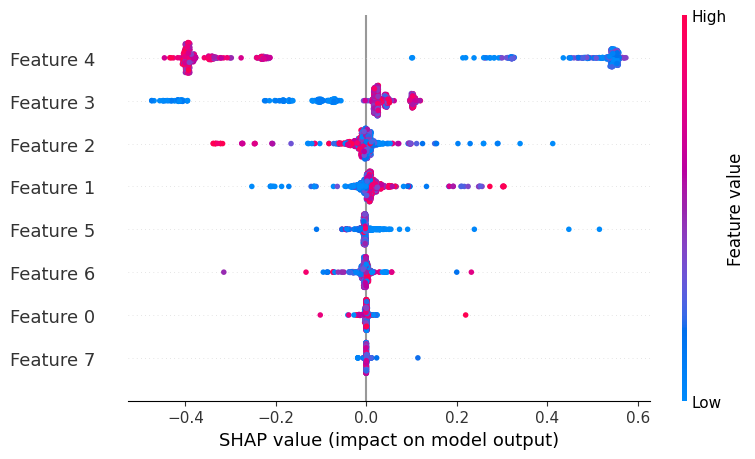

In [316]:
import shap

explainer = shap.TreeExplainer(dt_model)
shap_values = explainer.shap_values(X_test_transformed)


shap.summary_plot(shap_values[:, :, 1],X_test_transformed)

In [317]:
import pickle
pickle.dump(dt_model,open("/kaggle/working/loan_dt_model.pkl","wb"))